# MOVIES RECOMMENDATION SYSTEM - A collaborative appproach analysis

## Understanding the Data:

The dataset above was obtained through the TMDB API. The movies available in this dataset are in correspondence with the movies that are listed in the MovieLens Latest Full Dataset comprising of 26 million ratings on 45,000 movies from 27,000 users. Let us have a look at the features that are available to us.ers, as counted by TMDB.

**Features:**

adult: Indicates if the movie is X-Rated or Adult.


belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.


budget: The budget of the movie in dollars.


genres: A stringified list of dictionaries that list out all the genres associated with the movie.


homepage: The Official Homepage of the move.


id: The ID of the move.


imdb_id: The IMDB ID of the movie.


original_language: The language in which the movie was originally shot in.


original_title: The original title of the movie.


overview: A brief blurb of the movie.


popularity: The Popularity Score assigned by TMDB.


poster_path: The URL of the poster image.


production_companies: A stringified list of production companies involved with the making of the movie.


production_countries: A stringified list of countries where the movie was shot/produced in.


release_date: Theatrical Release Date of the movie.


revenue: The total revenue of the movie in dollars.


runtime: The runtime of the movie in minutes.


spoken_languages: A stringified list of spoken languages in the film.


status: The status of the movie (Released, To Be Released, Announced, etc.)


tagline: The tagline of the movie.


title: The Official Title of the movie.


video: Indicates if there is a video present of the movie with TMDB.


vote_average: The average rating of the movie.


vote_count: The number of votes by users, as counted by TMDB.

In [1]:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
import seaborn as sns

# For content-based filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# For collaborative filtering
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

# For handling warnings
import warnings
warnings.filterwarnings('ignore')


In [9]:
movies_data=pd.read_csv("movies_metadata.csv")

In [10]:
movies_data.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [11]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [12]:
print(movies_data.isnull().sum())

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


There are a total of 45,466 movies with 24 features. Most of the features have very few NaN values (apart from homepage and tagline). 

## Data Wrangling: 

1. Dropped columns that are not required for analysis
2. Removed NA values and duplicates from the data
3. Imputed the original language column with appropriate values 

In [13]:
# List of columns to drop
columns_to_drop = [
    'homepage', 
    'belongs_to_collection', 
    'original_title', 
    'overview', 
    'poster_path', 
    'release_date', 
    'revenue', 
    'status', 
    'tagline', 
    'video',
    'imdb_id'
]
# Dropping the specified columns
movies_dataset = movies_data.drop(columns=columns_to_drop)

In [14]:
# Display the updated DataFrame
movies_dataset.head()

,adult,budget,genres,id,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,title,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0


In [15]:
print(movies_dataset.isnull().sum())

adult                     0
budget                    0
genres                    0
id                        0
original_language        11
popularity                5
production_companies      3
production_countries      3
runtime                 263
spoken_languages          6
title                     6
vote_average              6
vote_count                6
dtype: int64


In [16]:
# Dropping rows where 'title' is null
movies_dataset = movies_dataset.dropna(subset=['title'])

# Display the updated DataFrame
movies_dataset.head()


,adult,budget,genres,id,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,title,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0


In [17]:
# Checking for duplicates in 'id', 'imdb_id', and 'title' columns
duplicate_ids = movies_dataset[movies_dataset.duplicated(subset=['id'])]
# Displaying the duplicates found
print("Duplicate 'id' rows:\n", duplicate_ids)

# Counting duplicate rows in the 'id' column
duplicate_id_count = movies_dataset['id'].duplicated().sum()

# Displaying the count
print("Number of duplicate 'id' rows:", duplicate_id_count)


Duplicate 'id' rows:
        adult    budget                                             genres  \
1465   False         0  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
9165   False         0  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...   
9327   False         0  [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...   
12066  False   1600000  [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...   
13375  False         0  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   
15074  False         4  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
15765  False      2500  [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...   
16764  False         0  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   
20843  False  40000000  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...   
20899  False         0                      [{'id': 18, 'name': 'Drama'}]   
21116  False         0                [{'id': 99, 'name': 'Documentary'}]   
21165  False         0  [{'id': 14, 'name': 'Fantasy'}

In [11]:
len(movies_dataset)

45460

In [18]:
# Removing duplicate rows in the 'id' column, keeping the first occurrence
movies_dataset_new = movies_dataset.drop_duplicates(subset='id', keep='first')

# Displaying the updated number of rows in the dataset
print("Number of rows after removing duplicates:", len(movies_dataset_new))


Number of rows after removing duplicates: 45430


In [19]:
# Filtering the rows where 'original_language' is null
missing_language_titles = movies_dataset_new[movies_dataset_new['original_language'].isnull()]['title']

# Displaying the list of movie titles
print("Movies with missing original language values:")
print(missing_language_titles)


Movies with missing original language values:
19574       Shadowing the Third Man
21602                Unfinished Sky
22832               13 Fighting Men
32141                     Lambchops
37407                 Prince Bayaya
41047                Song of Lahore
41872    Annabelle Serpentine Dance
44057         Lettre d'une inconnue
44410                          Yarn
44576                        WiNWiN
44655    The Surrender of Tournavos
Name: title, dtype: object


In [20]:
# Impute the 'original_language' column with the given values
impute_languages = {
    'WiNWiN': 'en',
    'The Surrender of Tournavos': 'fr',
    'Yarn': 'en',
    'Lettre d\'une inconnue': 'en',
    'Shadowing the Third Man': 'en',
    'Unfinished Sky': 'en',
    '13 Fighting Men': 'en',
    'Lambchops': 'en',
    'Prince Bayaya': 'cs',
    'Song of Lahore': 'ur',
    'Annabelle Serpentine Dance': 'silent'
}

# Update the 'original_language' column based on the movie title
movies_dataset_new['original_language'] = movies_dataset_new.apply(
    lambda row: impute_languages[row['title']] if pd.isnull(row['original_language']) and row['title'] in impute_languages else row['original_language'],
    axis=1
)

# Impute 'runtime' column null values with 0
movies_dataset_new['runtime'].fillna(0, inplace=True)
movies_dataset_new

,adult,budget,genres,id,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,title,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Subdue,4.0,1.0
45462,False,0,"[{'id': 18, 'name': 'Drama'}]",111109,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Century of Birthing,9.0,3.0
45463,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Betrayal,3.8,6.0
45464,False,0,[],227506,en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",87.0,[],Satan Triumphant,0.0,0.0


In [21]:
print(movies_dataset_new.isnull().sum())

adult                   0
budget                  0
genres                  0
id                      0
original_language       0
popularity              0
production_companies    0
production_countries    0
runtime                 0
spoken_languages        0
title                   0
vote_average            0
vote_count              0
dtype: int64


For content-based filtering, we need to transform genres into a list format.

In [22]:

# Drop the 'genres' column due to irregular values
movies_dataset_new = movies_dataset_new.drop(columns=['genres'])

# Confirm the column is dropped
print(movies_dataset_new.columns)


Index(['adult', 'budget', 'id', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'runtime',
       'spoken_languages', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [24]:
import ast
# Converting 'production_companies' to a list of company names
movies_dataset_new['production_companies'] = movies_dataset_new['production_companies'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# Converting 'production_countries' to a list of country names
movies_dataset_new['production_countries'] = movies_dataset_new['production_countries'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# Converting 'spoken_languages' to a list of language names
movies_dataset_new['spoken_languages'] = movies_dataset_new['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])


In [25]:
movies_dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45430 entries, 0 to 45465
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45430 non-null  object 
 1   budget                45430 non-null  object 
 2   id                    45430 non-null  object 
 3   original_language     45430 non-null  object 
 4   popularity            45430 non-null  object 
 5   production_companies  45430 non-null  object 
 6   production_countries  45430 non-null  object 
 7   runtime               45430 non-null  float64
 8   spoken_languages      45430 non-null  object 
 9   title                 45430 non-null  object 
 10  vote_average          45430 non-null  float64
 11  vote_count            45430 non-null  float64
dtypes: float64(3), object(9)
memory usage: 4.5+ MB


In [26]:
# Check for any non-numeric values in 'budget' and 'popularity'
# Convert 'budget' and 'popularity' to numeric, coercing any errors to NaN
movies_dataset_new['budget'] = pd.to_numeric(movies_dataset_new['budget'], errors='coerce')
movies_dataset_new['popularity'] = pd.to_numeric(movies_dataset_new['popularity'], errors='coerce')


In [93]:
movies_dataset_new.head()

,adult,budget,id,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,title,vote_average,vote_count
0,False,30000000,862,en,21.946943,[Pixar Animation Studios],[United States of America],81.0,[English],Toy Story,7.7,5415.0
1,False,65000000,8844,en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],104.0,"[English, Français]",Jumanji,6.9,2413.0
2,False,0,15602,en,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],101.0,[English],Grumpier Old Men,6.5,92.0
3,False,16000000,31357,en,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],127.0,[English],Waiting to Exhale,6.1,34.0
4,False,0,11862,en,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],106.0,[English],Father of the Bride Part II,5.7,173.0


## Data Visualization

In [103]:
from wordcloud import WordCloud, STOPWORDS

df_dv=movies_dataset_new.copy()

In [104]:
df_dv['title'] = df_dv['title'].astype('str')

In [105]:
title_corpus = ' '.join(df_dv['title'])

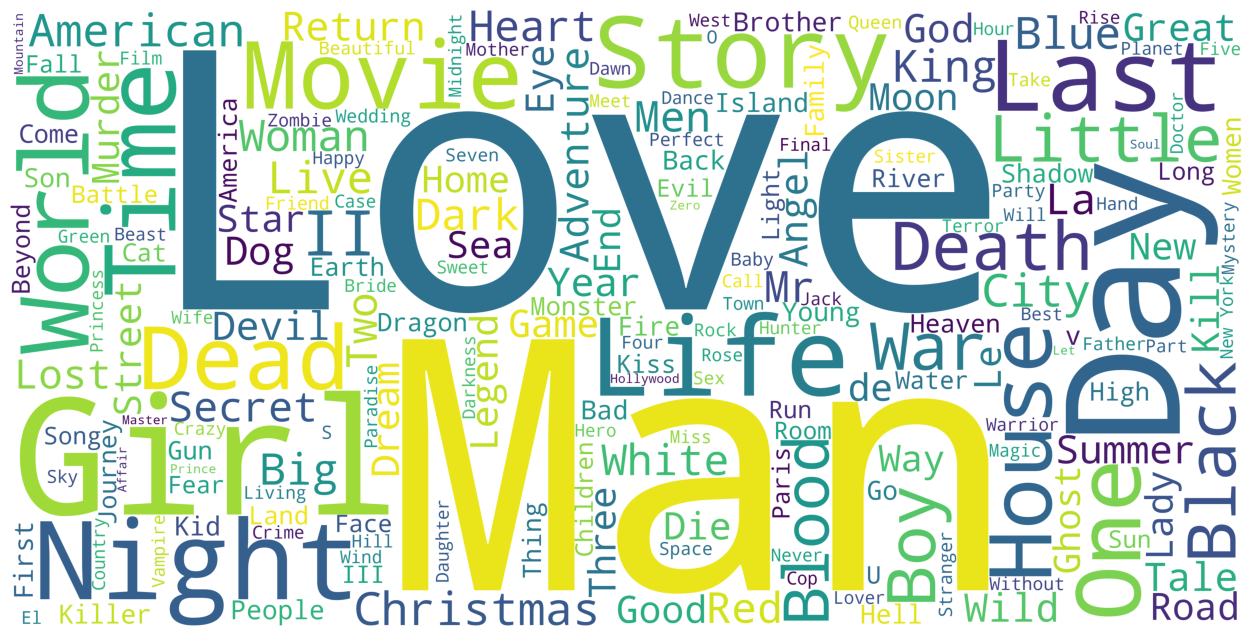

In [106]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [121]:
df_dv['original_language'].drop_duplicates().shape[0]

90

In [114]:
lang_df = pd.DataFrame(df_dv['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
original_language,,
en,32256,en
fr,2437,fr
it,1529,it
ja,1346,ja
de,1079,de


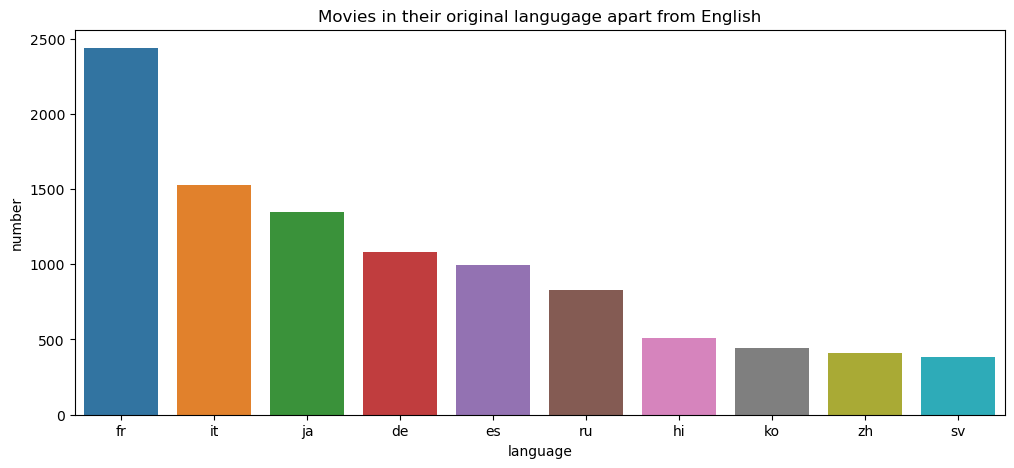

In [120]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.title("Movies in their original langugage apart from English")
plt.show()

There are over 90 unique languages represented in our dataset. As we had expected, English language films form the overwhelmingly majority. French and Italian movies come at a very distant second and third respectively. Japanese and Hindi form the majority as far as Asian Languages are concerned.

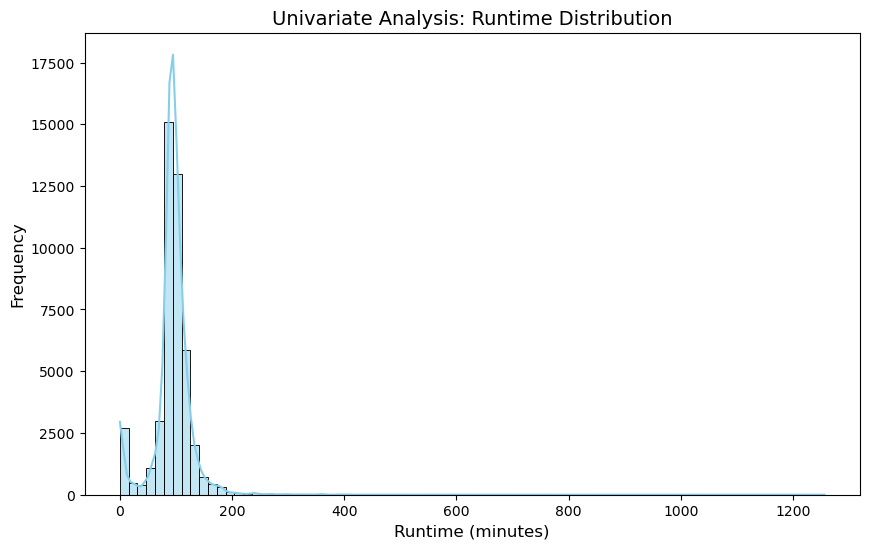

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_dv['runtime'], kde=True, bins=80, color='skyblue')
plt.title("Univariate Analysis: Runtime Distribution", fontsize=14)
plt.xlabel("Runtime (minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()



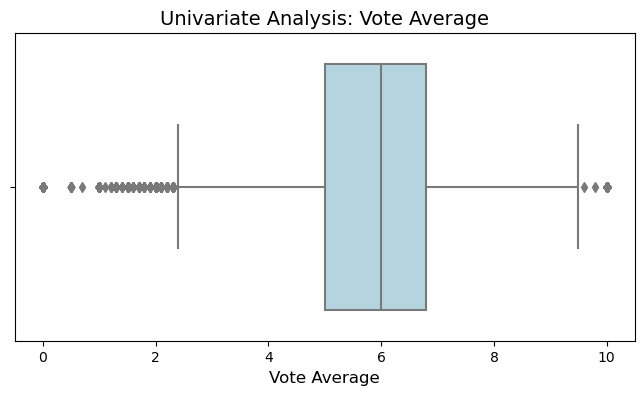

In [126]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_dv['vote_average'], color='lightblue')
plt.title("Univariate Analysis: Vote Average", fontsize=14)
plt.xlabel("Vote Average", fontsize=12)
plt.show()


## Content-based filtering: 

In [27]:
mv_data = movies_dataset_new.copy()

In [33]:
# Join genres back to string format for TF-IDF
mv_data['genres'] = mv_data['genres'].apply(lambda x: ' '.join(x))

# Apply TF-IDF Vectorizer to genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(mv_data['genres'])

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [83]:
# Create an index for movie titles
indices = pd.Series(mv_data.index, index=mv_data['title']).drop_duplicates()

# Recommendation function
def recommend_movies(title, cosine_sim=cosine_sim):
    # Get index of the movie that matches the title
    idx = indices[title]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return mv_data['title'].iloc[movie_indices]

# Test the function
print(recommend_movies('Rocky Balboa'))


1390           McHale's Navy
1533          Excess Baggage
2618                   Vibes
3204               3 Strikes
3276                  Nadine
4672     Operation Petticoat
5419                Stakeout
6179         Swords of Blood
8895         Dragons Forever
9345    Chinese Odyssey 2002
Name: title, dtype: object


In [35]:
print(recommend_movies('Dilwale Dulhania Le Jayenge'))

446                  Flesh and Bone
689                            Boys
779                       Lone Star
1504                         Gabbeh
2431            The School of Flesh
2472    Lovers of the Arctic Circle
2491                     Entrapment
5393                     Possession
6247                       For Sale
6640                  The Apartment
Name: title, dtype: object


In [36]:
print(recommend_movies('The Godfather'))

29                              Shanghai Triad
30                             Dangerous Minds
80     Things to Do in Denver When You're Dead
109                                Taxi Driver
144                     The Basketball Diaries
164                              Feast of July
172                                       Kids
260                                    L'Enfer
265                               Mi Vida Loca
276                        Murder in the First
Name: title, dtype: object


In [29]:
credits = pd.read_csv('credits.csv')
keywords = pd.read_csv('keywords.csv')

In [30]:
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')


In [31]:
mv_data['id'] = mv_data['id'].astype('int')

In [32]:
# Merge credits and keywords into the main dataset on 'id'
mv_data = mv_data.merge(credits[['id', 'cast', 'crew']], on='id', how='left')
mv_data = mv_data.merge(keywords[['id', 'keywords']], on='id', how='left')


In [33]:
print(mv_data.isnull().sum())

adult                   0
budget                  0
id                      0
original_language       0
popularity              0
production_companies    0
production_countries    0
runtime                 0
spoken_languages        0
title                   0
vote_average            0
vote_count              0
cast                    1
crew                    1
keywords                1
dtype: int64


In [34]:
# Drop rows with missing values in 'cast', 'crew', or 'keywords'
mv_data.dropna(subset=['cast', 'crew', 'keywords'], inplace=True)

# Verify there are no missing values left in these columns
print(mv_data.isnull().sum())

adult                   0
budget                  0
id                      0
original_language       0
popularity              0
production_companies    0
production_countries    0
runtime                 0
spoken_languages        0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
keywords                0
dtype: int64


In [36]:
import ast

# Helper function to parse stringified lists of dictionaries
def parse_column(dataframe, column):
    def parse_element(element):
        if isinstance(element, str) and element.startswith('[') and element.endswith(']'):
            try:
                # Evaluate element safely and extract 'name' if it's a list of dictionaries
                return [d['name'] for d in ast.literal_eval(element) if isinstance(d, dict) and 'name' in d]
            except (ValueError, SyntaxError):
                return []  # Return empty list if parsing fails
        return []  # Return empty list if not a parsable string
    
    # Apply the parsing function to the specified column
    return dataframe[column].apply(lambda x: parse_element(x) if pd.notnull(x) else [])


In [37]:
# Apply the parsing function to 'cast', and 'keywords' columns

mv_data['cast'] = parse_column(mv_data, 'cast')
mv_data['keywords'] = parse_column(mv_data, 'keywords')

# Optional: Preview the changes to confirm correct parsing
print(mv_data[['cast', 'keywords']].head())


                                                cast  \
0  [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...   
1  [Robin Williams, Jonathan Hyde, Kirsten Dunst,...   
2  [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...   
3  [Whitney Houston, Angela Bassett, Loretta Devi...   
4  [Steve Martin, Diane Keaton, Martin Short, Kim...   

                                            keywords  
0  [jealousy, toy, boy, friendship, friends, riva...  
1  [board game, disappearance, based on children'...  
2  [fishing, best friend, duringcreditsstinger, o...  
3  [based on novel, interracial relationship, sin...  
4  [baby, midlife crisis, confidence, aging, daug...  


In [42]:
import ast
import pandas as pd

def extract_directors(crew):
    try:
        # Parse the string into a list of dictionaries
        crew_list = ast.literal_eval(crew) if isinstance(crew, str) else crew
        # Ensure it's a list before processing
        if isinstance(crew_list, list):
            # Extract names where job is 'Director'
            return [d['name'] for d in crew_list if isinstance(d, dict) and d.get('job') == 'Director']
    except (ValueError, SyntaxError):  # Handle malformed strings
        return []
    return []  # Default return if input is invalid

# Apply the function to the 'crew' column
mv_data['crew'] = mv_data['crew'].apply(extract_directors)

# Combine features into a single string
mv_data['combined_features'] = mv_data['cast'] + mv_data['keywords'] + mv_data['crew']


In [44]:
# For 'crew', we filter only for 'Director' role
mv_data['crew'] = mv_data['crew'].apply(lambda x: [d['name'] for d in ast.literal_eval(x) if d['job'] == 'Director'] if pd.notnull(x) else [])

# Combine 'cast', 'keywords', and 'crew' into a single string feature
mv_data['combined_features'] = mv_data['cast'] + mv_data['keywords'] + mv_data['crew']
mv_data['combined_features'] = mv_data['combined_features'].apply(lambda x: ' '.join(x))


In [45]:
mv_data.head()

,adult,budget,id,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,keywords,combined_features
0,False,30000000,862,en,21.946943,[Pixar Animation Studios],[United States of America],81.0,[English],Toy Story,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[],"[jealousy, toy, boy, friendship, friends, riva...",Tom Hanks Tim Allen Don Rickles Jim Varney Wal...
1,False,65000000,8844,en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],104.0,"[English, Français]",Jumanji,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[],"[board game, disappearance, based on children'...",Robin Williams Jonathan Hyde Kirsten Dunst Bra...
2,False,0,15602,en,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],101.0,[English],Grumpier Old Men,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[],"[fishing, best friend, duringcreditsstinger, o...",Walter Matthau Jack Lemmon Ann-Margret Sophia ...
3,False,16000000,31357,en,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],127.0,[English],Waiting to Exhale,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...",[],"[based on novel, interracial relationship, sin...",Whitney Houston Angela Bassett Loretta Devine ...
4,False,0,11862,en,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],106.0,[English],Father of the Bride Part II,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...",[],"[baby, midlife crisis, confidence, aging, daug...",Steve Martin Diane Keaton Martin Short Kimberl...


### Movies based on the cast, crew, and keywords 

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Apply TF-IDF Vectorizer on the combined 'content' column
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(mv_data['combined_features'])

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Create an index mapping for titles
indices = pd.Series(movies_dataset_new.index, index=movies_dataset_new['title']).drop_duplicates()


In [62]:
def recommend_movies(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]
    
    # Get pairwise similarity scores of all movies with the given movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the 10 most similar movies
    sim_scores = sim_scores[1:11]  # Skip the first movie (itself)
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar movies
    return movies_dataset_new['title'].iloc[movie_indices]


In [63]:
# Test the recommendation function
recommend_movies('Dilwale Dulhania Le Jayenge')


13998         Stone of Destiny
1006        The Sound of Music
993                 Cinderella
32308      Coo of The Far Seas
6161          Winged Migration
32023                 Robotrix
27110    The Mysterious Island
36418              Cabin Fever
36419              Son of Mine
5946             Honkytonk Man
Name: title, dtype: object

Since the movies have been recommended based on the keywords, cast and crew. These suggestions seem somewhat valid as all of them are musical hits. 

In [69]:
# Test the recommendation function
recommend_movies('Zero Effect')


1866          Friday the 13th Part 2
37024                         Female
37025                     Loco Fever
412                        Barcelona
12760              Zombie Strippers!
1802                 Doctor Dolittle
38819    The Philadelphia Experiment
26197              Hate Thy Neighbor
6586                        The Rose
7670                  Little Murders
Name: title, dtype: object

### Movies based on the cast/actor: 

In [ ]:
# Define the function to recommend movies based on the cast
def recommend_by_cast(actor_name, mv_data):
    # Filter movies where the cast contains the given actor
    recommended_movies = mv_data[mv_data['cast'].apply(lambda x: actor_name in x)]
    
    # Return the list of movie titles
    return recommended_movies['title'].tolist()

In [74]:
# Example usage: Recommend movies with Tom Hanks
tom_hanks_movies = recommend_by_cast('Tom Hanks', mv_data)

# Display the recommended movies
print("Movies featuring Tom Hanks:")
print(tom_hanks_movies)


Movies featuring Tom Hanks:
['Toy Story', 'Apollo 13', 'Forrest Gump', 'Philadelphia', 'Sleepless in Seattle', 'The Celluloid Closet', 'That Thing You Do!', 'Saving Private Ryan', "The 'Burbs", 'Splash', 'The Money Pit', 'Nothing in Common', "You've Got Mail", 'Big', 'Return with Honor', 'Toy Story 2', 'The Bonfire of the Vanities', 'The Green Mile', 'A League of Their Own', 'Volunteers', 'Bachelor Party', 'Punchline', 'Cast Away', 'Turner & Hooch', "He Knows You're Alone", 'Joe Versus the Volcano', 'Road to Perdition', 'Catch Me If You Can', 'Radio Flyer', 'Dragnet', 'The Ladykillers', 'The Terminal', 'The Man with One Red Shoe', 'The Polar Express', 'From the Earth to the Moon', 'The Da Vinci Code', 'Cars', 'Who Killed the Electric Car?', 'The Simpsons Movie', "Charlie Wilson's War", 'The Great Buck Howard', 'Angels & Demons', 'Shooting War', 'Toy Story 3', 'The Pixar Story', 'Larry Crowne', 'Extremely Loud & Incredibly Close', 'The War', 'Cloud Atlas', "The Rutles 2: Can't Buy Me Lu

## Collaborative Filtering:

In [89]:
# Load the ratings data
import pandas as pd

# Assuming ratings data file is named 'ratings.csv'
ratings = pd.read_csv('ratings.csv')

# Preview the ratings data
print(ratings.head())
print(ratings.info())

# Check for any missing values in userId, movieId, and rating
print(ratings.isnull().sum())


   userId  movieId  rating   timestamp
0       1      110     1.0  1425941529
1       1      147     4.5  1425942435
2       1      858     5.0  1425941523
3       1     1221     5.0  1425941546
4       1     1246     5.0  1425941556
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB
None
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [90]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Define the reader based on rating scale
reader = Reader(rating_scale=(1, 5))

# Load dataset from ratings DataFrame
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Initialize SVD algorithm
svd = SVD()

# Evaluate with cross-validation
results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7965  0.7955  0.7962  0.7966  0.7954  0.7960  0.0005  
MAE (testset)     0.6024  0.6018  0.6023  0.6024  0.6018  0.6021  0.0003  
Fit time          286.11  306.76  309.67  269.22  269.88  288.33  17.35   
Test time         963.24  1075.39 965.42  623.36  676.95  860.87  177.58  


In [28]:
# Train the SVD model on the entire dataset
trainset = data.build_full_trainset()
svd.fit(trainset)

# Function to predict rating for a specific userId and movieId
def predict_rating(user_id, movie_id):
    prediction = svd.predict(user_id, movie_id)
    return prediction.est

# Predict the rating for a specific userId and movieId
user_id = 1  
movie_id = 5 
predicted_rating = predict_rating(user_id, movie_id)
print(f'Predicted rating for movie {movie_id} by user {user_id}: {predicted_rating}')

Predicted rating for movie 5 by user 1: 3.4338074002756267


In [29]:
# average rating for a movie
movie_id = 5  # Replace with the movie ID you're interested in

# Filter the ratings DataFrame for the specified movie and calculate the average rating
average_rating = ratings[ratings['movieId'] == movie_id]['rating'].mean()

print(f"The average rating for movie ID {movie_id} is {average_rating:.2f}")


The average rating for movie ID 5 is 3.08


### Recommend movies to a user X using collaborative filtering without relying on specific user pairs. 

In [30]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
import pandas as pd

# Define a function to get top N movie recommendations for a user
def get_top_n_recommendations(algo, user_id, ratings, n=5):
    # Get a list of all movie IDs in the dataset
    all_movie_ids = ratings['movieId'].unique()
    
    # Get a list of movie IDs that the user has already rated
    user_rated_movies = ratings[ratings['userId'] == user_id]['movieId'].tolist()
    
    # Filter out movies the user has already rated
    movies_to_predict = [movie_id for movie_id in all_movie_ids if movie_id not in user_rated_movies]
    
    # Predict ratings for movies the user hasn't rated yet
    predictions = [algo.predict(user_id, movie_id) for movie_id in movies_to_predict]
    
    # Sort predictions by estimated rating in descending order and select top N
    top_n_recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    
    # Extract movie IDs and predicted ratings for the top recommendations
    top_n_movies = [(pred.iid, pred.est) for pred in top_n_recommendations]
    
    return pd.DataFrame(top_n_movies, columns=['movieId', 'predicted_rating'])

# Example user ID for whom we want recommendations
user_id = 1  # Replace with the user ID you want recommendations for

# Get top 5 movie recommendations
top_movies = get_top_n_recommendations(svd, user_id, ratings, n=5)
print(f"Top 5 movie recommendations for user {user_id} based on collaborative filtering:")
print(top_movies)


Top 5 movie recommendations for user 1 based on collaborative filtering:
   movieId  predicted_rating
0    64241          5.000000
1   159819          5.000000
2    26453          4.973530
3   159817          4.946916
4     5194          4.916187


In [73]:
import matplotlib.pyplot as plt
import pandas as pd
# Step 1: Create a duplicate of the `ratings` DataFrame and add movie titles
ratings['movieId'] = ratings['movieId'].astype(int)
movies_dataset_new['id'] = movies_dataset_new['id'].astype(int)

# Merge ratings with movie titles
ratings_new = ratings.merge(movies_dataset_new[['id', 'title']], left_on='movieId', right_on='id', how='left')

# Ensure 'title' is a string column and fill NaN with 'NA'
ratings_new['title'] = ratings_new['title'].astype(str)
ratings_new['title'].fillna('NA', inplace=True)


# Fill null values in the entire DataFrame with 'NA'
ratings_new.fillna('NA', inplace=True)

# Verify if null values are filled
print(ratings_new.isna().sum())  # This should now show 0 nulls in each column


userId       0
movieId      0
rating       0
timestamp    0
id           0
title        0
dtype: int64


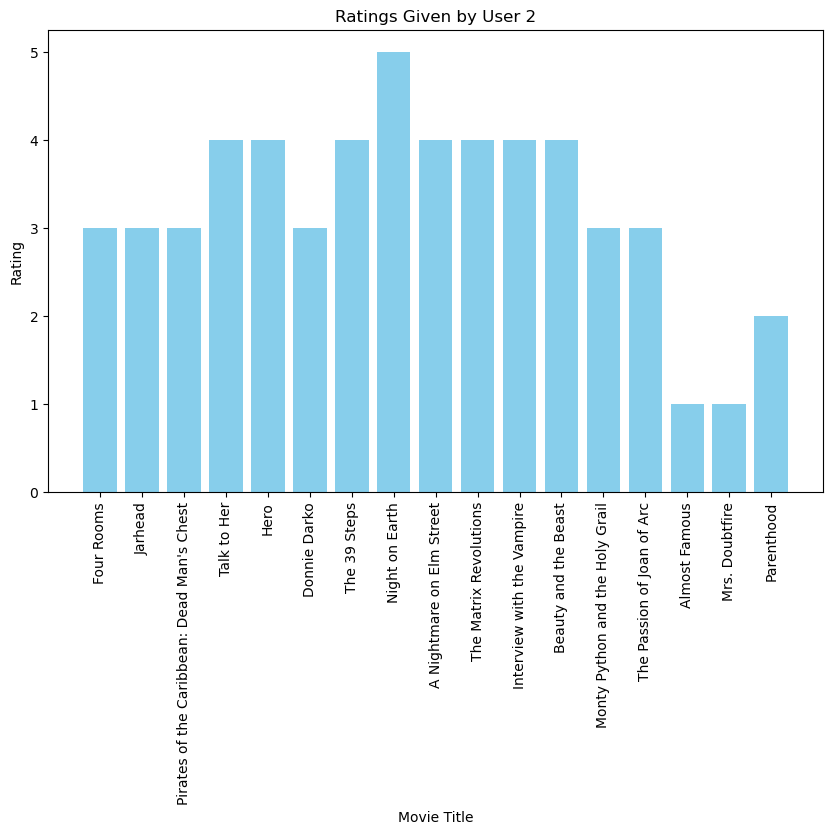

In [85]:
# Filter out rows with NaN titles
user_ratings = ratings_new[(ratings_new['userId'] == 2) & (ratings_new['title']!="nan")]

# Plotting user ratings (with movie title on x-axis and rating on y-axis)
plt.figure(figsize=(10, 6))
plt.bar(user_ratings['title'], user_ratings['rating'], color='skyblue')
plt.xticks(rotation=90)  # Rotate titles for better visibility
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.title('Ratings Given by User 2')
plt.show()


## Neural collaborative filering

This method uses neural networks to learn latent factors in a user-item interaction matrix. It’s a more complex approach to collaborative filtering.

Neural Collaborative Filtering (NCF): Builds a multi-layer neural network to predict user-item interactions by learning the non-linear relationship between users and items.

Implementation: Use Keras or PyTorch to build a neural network model for collaborative filtering.

In [127]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load your ratings data
ratings = pd.read_csv('ratings.csv')  # Modify with your actual ratings file

# Split the data into train and test sets
train_data, test_data = train_test_split(ratings, test_size=0.1, random_state=42)

# Extract user, item, and rating columns for NCF
train_user = train_data['userId'].values
train_item = train_data['movieId'].values
train_rating = train_data['rating'].values

test_user = test_data['userId'].values
test_item = test_data['movieId'].values
test_rating = test_data['rating'].values


In [128]:
#build the model
import tensorflow as tf
from tensorflow.keras import layers, models

# Number of users and items (based on the dataset)
num_users = ratings['userId'].nunique()
num_items = ratings['movieId'].nunique()
embedding_size = 50  

# Define the NCF model
def create_ncf_model():
    user_input = layers.Input(shape=(1,))
    item_input = layers.Input(shape=(1,))

    # Embedding layers for users and items
    user_embedding = layers.Embedding(num_users, embedding_size)(user_input)
    item_embedding = layers.Embedding(num_items, embedding_size)(item_input)

    # Flatten the embeddings
    user_flat = layers.Flatten()(user_embedding)
    item_flat = layers.Flatten()(item_embedding)

    # Concatenate user and item embeddings
    concatenated = layers.concatenate([user_flat, item_flat])

    # Fully connected layers (Feed-forward neural network)
    dense = layers.Dense(128, activation='relu')(concatenated)
    dense = layers.Dense(64, activation='relu')(dense)
    output = layers.Dense(1)(dense)

    model = models.Model(inputs=[user_input, item_input], outputs=output)
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Create the model
ncf_model = create_ncf_model()

# Summary of the model
ncf_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 50)     │ 13,544,800 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 1, 50)     │  2,255,750 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 50)        │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 50)        │          0 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 100)       │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │     12,928 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      8,256 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         65 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 15,821,799 (60.36 MB)

 Trainable params: 15,821,799 (60.36 MB)

 Non-trainable params: 0 (0.00 B)

In [129]:
from tensorflow.keras.mixed_precision import set_global_policy

set_global_policy('mixed_float16')
# Your model will now use mixed precision for faster computation


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history = ncf_model.fit(
    [train_user, train_item], 
    train_rating, 
    epochs=10, 
    batch_size=512, 
    validation_data=([test_user, test_item], test_rating),
    callbacks=[early_stopping]
)


In [131]:
#evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions
predictions = ncf_model.predict([test_user, test_item])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test_rating, predictions))
mae = mean_absolute_error(test_rating, predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


81326/81326 ━━━━━━━━━━━━━━━━━━━━ 83s 1ms/step
RMSE: 0.8481489160023922
MAE: 0.6397985924028495
